# <div style="text-align: center"> Using Python ADVANCED

## <div style="text-align: center">Introduction to Python (IV) - Advanced topics

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

We will often use these and other imports appearing in the notebook, and probably we will not always want to enter them all. Sometimes it's good to take a moment and keyboard in all these imports, but for the sake of our time and mental comfort we can create a `.py` file with all frequently used imports and continue to use it in our notebook. That's why the warm-up exercise is waiting for you:

### Exercise - Importing functions from external files
* Create the file `imports.txt` in the folder with this notebook. In addition, you can use, for example, the text editor [Atom](https://atom.io/).
* copy to the file `imports.txt` imports appearing in the first two cells of this notebook (but not`%matplotlib inline` - it is a "magical function" and works only in notebooks) and save `imports.py`
* replace the contents of the first cell of this notebook (the one with imports) with:
  ```Python
  from imports import *
  ```
  it means *import everything from a file / module called `imports`*
* restart your notebook (`kernel -> restart`), start from the beginning and check if the following cell is working:

In [3]:
from my_imports import *
%matplotlib inline

In [4]:
np.sqrt(4)

2.0

---

# Databases - advanced level
File operations, dates, data wrangling

### Below we load 4 .json files downloaded from Wikidata:
https://www.wikidata.org/wiki/Wikidata:Main_Page <br>
https://query.wikidata.org/ <br>

These files contain various data about musicians from specific styles of music. However, all databases have the same number of columns (though different number of rows). They are taken from json files, so this is semi-structured data.

Let's define a path to load files so that you do not have to enter it constantly over and over again:

In [8]:
PTH = r'C:\Users\leont\Google Drive\CLASSES\ALK 2019-2020\Using Python\python_class_3_BASIC\DATA'

# the below code is creating a list of all file addresses - json files
FILES_JSON = glob.glob(op.join(PTH, '*.json')) 

In [9]:
op.join(PTH, '*.json')

'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\*.json'

In [10]:
FILES_JSON

['C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_death_metal.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_hip_hop_music.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_jazz.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_pop_music.json']

We can load the first file to review it

In [11]:
with open(FILES_JSON[0], encoding='utf-8', errors='ignore') as json_data:
         data = json.load(json_data, strict=False)

# create a new dataframe, and normalize it
df_json = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [13]:
# data list consists of dictionaries - not convenient for operations
data[0]

{'instance_of': 'http://www.wikidata.org/entity/Q25660',
 'instance_ofLabel': 'Tomasz Wróblewski',
 'date_of_birth': '1980-06-02T00:00:00Z',
 'country_of_citizenship': 'http://www.wikidata.org/entity/Q36',
 'country_of_citizenshipLabel': 'Poland',
 'instrument': 'http://www.wikidata.org/entity/Q6607',
 'instrumentLabel': 'guitar',
 'occupation': 'http://www.wikidata.org/entity/Q177220',
 'occupationLabel': 'singer',
 'sex_or_gender': 'http://www.wikidata.org/entity/Q6581097',
 'sex_or_genderLabel': 'male',
 'place_of_birth': 'http://www.wikidata.org/entity/Q270',
 'place_of_birthLabel': 'Warsaw'}

What does the base look like? Please display the first 5 lines.

In [26]:
df_json.head()

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
0,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q17172850,voice,http://www.wikidata.org/entity/Q177220,singer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q25660,Tomasz Wróblewski,1980-06-02T00:00:00Z,http://www.wikidata.org/entity/Q36,Poland,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q183945,record producer,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q270,Warsaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Please check the dimensions of the base, and then check how many 'unique' musicians are in the base.

</div>

In [16]:
df_json.shape

(371, 20)

In [17]:
df_json.columns

Index(['instance_of', 'instance_ofLabel', 'date_of_birth',
       'country_of_citizenship', 'country_of_citizenshipLabel', 'instrument',
       'instrumentLabel', 'occupation', 'occupationLabel', 'sex_or_gender',
       'sex_or_genderLabel', 'place_of_birth', 'place_of_birthLabel',
       'date_of_death', 'cause_of_death', 'cause_of_deathLabel',
       'manner_of_death', 'manner_of_deathLabel', 'place_of_death',
       'place_of_deathLabel'],
      dtype='object')

In [20]:
print('Number of unique musicians:', len(df_json.instance_ofLabel.unique()))

df_json.instance_ofLabel.unique()

Number of unique musicians: 100


array(['Tomasz Wróblewski', 'Patryk Dominik Sztyber', 'Kristian Wåhlin',
       'Igor Pablo Cavalera', 'Alex Webster', 'Varg Vikernes',
       'Chuck Schuldiner', 'Rob Barrett', 'Jim Root', 'Phil Anselmo',
       'Mick Thomson', 'Paul Speckmann', 'Chris Reifert', 'David Kinkade',
       'Mike Browning', 'Donald Tardy', 'Richard Brunelle', 'Flo Mounier',
       'Tim Yeung', 'Shane Embury', 'Mitch Harris', 'Burton C. Bell',
       'Johan Edlund', 'Mike Smith', 'Fred Estby', 'Steve Asheim',
       'Marcin Rygiel', 'Destructhor', 'David Vincent', 'Terry Butler',
       'James Murphy', 'Johan Reinholdz', 'Derek Roddy',
       'Mieszko Talarczyk', 'Steve Di Giorgio', 'Rick Rozz',
       'Fredrik Norrman', 'Jørn Inge Tunsberg', 'Fenriz',
       'Jan Axel Blomberg', 'Nocturno Culto', 'Gene Hoglan',
       'Jeroen Paul Thesseling', 'Max Thornell', 'Dallas Ward',
       'John Ortega', 'Sterling Von Scarborough', 'Tony Norman',
       'Krzysztof Oloś', 'Mateusz Śmierzchalski', 'Christian Andreu',

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Please check what data types we have in each column.

</div>

In [24]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   instance_of                  371 non-null    object
 1   instance_ofLabel             371 non-null    object
 2   date_of_birth                345 non-null    object
 3   country_of_citizenship       366 non-null    object
 4   country_of_citizenshipLabel  366 non-null    object
 5   instrument                   361 non-null    object
 6   instrumentLabel              361 non-null    object
 7   occupation                   371 non-null    object
 8   occupationLabel              371 non-null    object
 9   sex_or_gender                371 non-null    object
 10  sex_or_genderLabel           371 non-null    object
 11  place_of_birth               339 non-null    object
 12  place_of_birthLabel          339 non-null    object
 13  date_of_death                36 non

In [25]:
df_json.dtypes

instance_of                    object
instance_ofLabel               object
date_of_birth                  object
country_of_citizenship         object
country_of_citizenshipLabel    object
instrument                     object
instrumentLabel                object
occupation                     object
occupationLabel                object
sex_or_gender                  object
sex_or_genderLabel             object
place_of_birth                 object
place_of_birthLabel            object
date_of_death                  object
cause_of_death                 object
cause_of_deathLabel            object
manner_of_death                object
manner_of_deathLabel           object
place_of_death                 object
place_of_deathLabel            object
dtype: object

We define two variables, where one will contain only columns with dates, and the other all others.

In [27]:
col_dates = ['date_of_birth', 'date_of_death']

col_no_dates = ['cause_of_deathLabel', 'manner_of_deathLabel',
                'country_of_citizenshipLabel', 'place_of_birthLabel',
                'place_of_deathLabel', 'sex_or_genderLabel']

In [29]:
len(col_no_dates)

6

Please think about how to merge the entire database, but in such a way that one row would be one person (it's a very difficult task!).

#### This can be done e.g. in the following way:

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Please create an empty DataFrame called `df` that would have as columns 'instance_ofLabel'+col_dates+col_no_dates, and the length of the df (i.e. the number of rows) would be equal to the number of unique musicians in the base.

</div>

In [39]:
my_columns = ['musician_name'] + col_dates + col_no_dates

my_index = len(df_json.instance_ofLabel.unique())

df = pd.DataFrame(index=range(my_index), columns=my_columns)

In [40]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.shape

(100, 9)

So above attribute means that we will have 100 unique musicians in the death metal music genre.

### Now, please fill in the first column `musician_name` with unique names of musicians.

**IMPORTANT**: We need unique musicians in each row, because in statistics/visualisations etc. each separate row should correspond to a separate person/object/event. Otherwise, you would visualise e.g. 18 Tomasz Wróblewskis from our database and 5 Alex Websters, instead of 1 instance of each musician! This would create a bias in your statistics/visualisations.

In [43]:
df.musician_name = df_json.instance_ofLabel.unique()

In [43]:
df['musician_name'] = df_json.instance_ofLabel.unique()

In [45]:
df.head()

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Tomasz Wróblewski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Patryk Dominik Sztyber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kristian Wåhlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Igor Pablo Cavalera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alex Webster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Sort the base by musician names.

</div>

In [52]:
df = df.sort_values(by='musician_name').reset_index(drop=True)

In [53]:
df.head(2)

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allen West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
⚠️TASK 5 (VERY DIFFICULT)
<br>

Please fill in the dataframe `df` with data from `df_json`. This is difficult, since the dataframes have different dimensions. So you need to devise a way of filling smaller `df` with squeezed info from `df_json`.
<br><br>
HINT: you need to use a loop and go through `col_dates` and `col_no_dates`, and in each iteration assign certain values to `df` using `df.loc[:, column]`. 

</div>

In [84]:
str(df_json[df_json.instance_ofLabel=='Flo Mounier'].country_of_citizenshipLabel.unique())

"['Canada' 'France']"

In [79]:
name

'Flo Mounier'

In [80]:
column

'country_of_citizenshipLabel'

In [87]:
df.head(4)

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,1969-10-25T00:00:00Z,NaN,NaN,NaN,United States of America,Akron,NaN,male
1,Allen West,1967-10-17T00:00:00Z,NaN,NaN,NaN,United States of America,Brandon,NaN,male
2,Anders Hammer,1980-04-03T00:00:00Z,NaN,NaN,NaN,Sweden,NaN,NaN,male
3,Ares,1973-06-03T00:00:00Z,NaN,NaN,NaN,Norway,Bergen,NaN,male


In [93]:
df[df.musician_name=='Flo Mounier'].country_of_citizenshipLabel.values[0]

"['Canada' 'France']"

In [92]:
type(df[df.musician_name=='Flo Mounier'].country_of_citizenshipLabel.values[0])

str

In [56]:
df.query('musician_name == "Alex Webster"')

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel
0,Alex Webster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_json.query('instance_ofLabel == "Alex Webster"')

,instance_of,instance_ofLabel,date_of_birth,country_of_citizenship,country_of_citizenshipLabel,instrument,instrumentLabel,occupation,occupationLabel,sex_or_gender,sex_or_genderLabel,place_of_birth,place_of_birthLabel,date_of_death,cause_of_death,cause_of_deathLabel,manner_of_death,manner_of_deathLabel,place_of_death,place_of_deathLabel
33,http://www.wikidata.org/entity/Q201716,Alex Webster,1969-10-25T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q2538400,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,http://www.wikidata.org/entity/Q201716,Alex Webster,1969-10-25T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q639669,musician,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q2538400,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,http://www.wikidata.org/entity/Q201716,Alex Webster,1969-10-25T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q6607,guitar,http://www.wikidata.org/entity/Q855091,guitarist,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q2538400,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,http://www.wikidata.org/entity/Q201716,Alex Webster,1969-10-25T00:00:00Z,http://www.wikidata.org/entity/Q30,United States of America,http://www.wikidata.org/entity/Q46185,bass guitar,http://www.wikidata.org/entity/Q855091,guitarist,http://www.wikidata.org/entity/Q6581097,male,http://www.wikidata.org/entity/Q2538400,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
sum(df_json.instance_ofLabel=="Alex Webster")

4

In [66]:
my_columns[1:]

['date_of_birth',
 'date_of_death',
 'cause_of_deathLabel',
 'manner_of_deathLabel',
 'country_of_citizenshipLabel',
 'place_of_birthLabel',
 'place_of_deathLabel',
 'sex_or_genderLabel']

In [77]:
df_json.loc[df_json.instance_ofLabel=="Alex Webster", my_columns[1:]].loc[33, :].unique()

array(['1969-10-25T00:00:00Z', nan, 'United States of America', 'Akron',
       'male'], dtype=object)

In [85]:
# CREATING the final dataframe

for name in tqdm(df.musician_name):
    for column in my_columns[1:]:
        try:
            df.loc[df.musician_name==name, column] = df_json.loc[df_json.instance_ofLabel==name, column].unique()
        except:
            df.loc[df.musician_name==name, column] = str(df_json.loc[df_json.instance_ofLabel==name, column].unique())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
# OR
# we are looping through the unique musicians and assigning the first row of each unique musician 
# from df_json to df

for idx, person in enumerate(df.musician_name):
    df.loc[idx, col_dates+col_no_dates] = df_json.query('instance_ofLabel == "{}"'.   # enter added for convinience
                                                        format(person)).reset_index().loc[0, col_dates+col_no_dates]

<div class="alert alert-block alert-warning">
📺 WATCH AT HOME
<br>

In the above code we have used the very important functions `enumerate` and `query`:

[Enumerate - Intermediate Python Programming](https://www.youtube.com/watch?v=bOGmYvtw-kk)
<br>
[Python Pandas | Querying Dataframe](https://www.youtube.com/watch?v=6WTFF-mKZX8)

</div>

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Please replace the objects in the columns with dates with the date format using the function `pd.to_datetime()`.
HINT: this function should take the parameter `format = '%Y-%m-%dT%H:%M:%SZ'` - this is exactly the format of our dates in this file.

</div>

In [107]:
col_dates

['date_of_birth', 'date_of_death']

In [108]:
for column in col_dates:
    df[column] = pd.to_datetime(df[column], format = '%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [109]:
df.date_of_birth[0]

Timestamp('1969-10-25 00:00:00')

In [110]:
type(df.date_of_birth[0])

pandas._libs.tslibs.timestamps.Timestamp

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   musician_name                100 non-null    object        
 1   date_of_birth                95 non-null     datetime64[ns]
 2   date_of_death                12 non-null     datetime64[ns]
 3   cause_of_deathLabel          5 non-null      object        
 4   manner_of_deathLabel         6 non-null      object        
 5   country_of_citizenshipLabel  97 non-null     object        
 6   place_of_birthLabel          81 non-null     object        
 7   place_of_deathLabel          5 non-null      object        
 8   sex_or_genderLabel           100 non-null    object        
dtypes: datetime64[ns](2), object(7)
memory usage: 7.2+ KB


<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Add a group name (the music genre name) to the dataframe as the last column.<br>
HINT: you can use the json file name to do it.

</div>

In [ ]:
# # this will work, however, this is added manually
# df['Genre'] = 'death metal'

In [112]:
FILES_JSON[0]

'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_death_metal.json'

In [116]:
FILES_JSON

['C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_death_metal.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_hip_hop_music.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_jazz.json',
 'C:\\Users\\leont\\Google Drive\\CLASSES\\ALK 2019-2020\\Using Python\\python_class_3_BASIC\\DATA\\death_pop_music.json']

In [124]:
# this is a much better, programmatic answer!
# YOU HAVE TO COMMENT OUT THE CODE LINE BELOW THAT YOU ARE NOT USING; otherwise you'll get an error
# for Windows
df['genre'] = FILES_JSON[0].split('\\')[-1].split('.')[0][6:]
# for Mac/Linux
df['genre'] = FILES_JSON[0].split('/')[-1].split('.')[0][6:]

In [125]:
df.head(2)

,musician_name,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel,genre
0,Alex Webster,1969-10-25,NaT,NaN,NaN,United States of America,Akron,NaN,male,death_metal
1,Allen West,1967-10-17,NaT,NaN,NaN,United States of America,Brandon,NaN,male,death_metal


<div class="alert alert-block alert-success">
⚠️TASK 8 (DIFFICULT)
<br>

Please create a loop now, that would load each file from `FILES_JSON`, and then do the above operations on each of them in the loop. Then, add each file to a grand dataframe (merging all files together in one big dataframe)!

</div>

In [ ]:
groups = ['Metal', 'Jazz', 'Pop Music', 'Hip Hop Music']

df_final = pd.DataFrame(columns=['musician_name']+col_dates+col_no_dates)

for n, genre in enumerate(groups):
    print(n, genre)
    with open(FILES_JSON[n], encoding='utf-8', errors='ignore') as json_data:
         data = json.load(json_data, strict=False)
            
    # create a new dataframe, and normalize it
    df_json = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
    
    df = pd.DataFrame(index= range(len(df_json.instance_ofLabel.unique())), 
                      columns=['musician_name']+col_dates+col_no_dates)
    
    df.musician_name = df_json.instance_ofLabel.unique()
    
    df = df.sort_values(by=['musician_name'], axis=0)
    
    df.reset_index(inplace=True, drop=True)
    
    for i in df.musician_name:
        for column in df.columns[1:]:
            try:
                df.loc[df.musician_name==i, column] = df_json.loc[df_json.instance_ofLabel==i,column].unique()
            except:
                df.loc[df.musician_name==i, column] = str(df_json.loc[df_json.instance_ofLabel==i,column].unique())

    for col in col_dates:
        df[col] = pd.to_datetime(df[col], format = '%Y-%m-%dT%H:%M:%SZ', errors='coerce')
    
    df['genre'] = genre
    
    df_final = pd.concat([df_final,df],ignore_index=True)


# Below, we are importing the final code written by me, for setting up the databases and merging them into one dataframe

In [6]:
PTH = r'C:\Users\HP\Dysk Google\CLASSES\ALK 2020-2021\Introduction to Python and Machine Learning\Class 4\DATA'

# the below code is creating a list of all file addresses - json files
FILES_JSON = glob.glob(op.join(PTH, '*.json')) 

In [9]:
from create_dataframe_music import create_music_df

from my_imports import *
%matplotlib inline

In [10]:
DB_final = create_music_df(file_name=FILES_JSON)

There are 4 genres of music to process...




******************* Starting the file: death_metal...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: hip_hop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: jazz...
--------======WARNING======-------- There are persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...


******************* Starting the file: pop_music...
---=== OK ===--- There are no persons with the same name in the DB
Filling the data with list of lists from json...
Calculating years of living...





In [11]:
DB_final.head()

,instance_ofLabel,instance_of,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel,quantity_instrumentLabel,quantity_occupationLabel,years_of_life,group
0,Alex Webster,NaN,1969-10-25,NaT,NaN,NaN,United States of America,Akron,NaN,male,2.0,2,NaN,death_metal
1,Allen West,NaN,1967-10-17,NaT,NaN,NaN,United States of America,Brandon,NaN,male,1.0,1,NaN,death_metal
2,Anders Hammer,NaN,1980-04-03,NaT,NaN,NaN,Sweden,NaN,NaN,male,1.0,1,NaN,death_metal
3,Ares,NaN,1973-06-03,NaT,NaN,NaN,Norway,Bergen,NaN,male,2.0,3,NaN,death_metal
4,Astennu,NaN,2000-01-01,NaT,NaN,NaN,Australia,Sydney,NaN,male,1.0,3,NaN,death_metal


In [12]:
DB_final.shape

(3389, 14)

---

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Please check the minimum year of birth in each of the 4 music groups.

</div>

In [14]:
DB_final.groupby("group").date_of_birth.min()

group
death_metal     1953-01-01
hip_hop_music   1950-01-01
jazz            1877-05-25
pop_music       1898-06-09
Name: date_of_birth, dtype: datetime64[ns]

<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

Please visualize the years of life and see if everything is good.

</div>

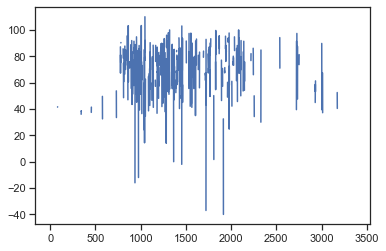

In [15]:
DB_final.years_of_life.plot()

You can see above that the `years_of_life` are broken - we have persons living negative numbers of years!

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Please select from the database only those who were born in the earliest year of birth in the death metal group and later (i.e. when the first death metal musician was born and later). Assign the result dataframe to the variable `df_death`. Please also remove people who have a negative life duration.

</div>

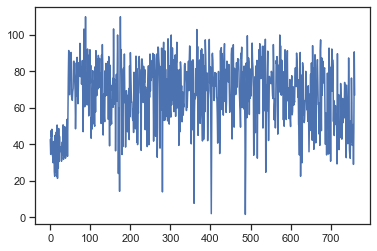

In [39]:
# selecting from the database only those who were born in the earliest year of birth in the death metal group and later
earliest_birth_date = DB_final.query('group == "death_metal"').date_of_birth.min()

df_death = DB_final[DB_final.date_of_birth >= earliest_birth_date]

# removing negative years
df_death = DB_final[DB_final.years_of_life > 0].reset_index(drop=True)



# checking if years_of_life are correct now
df_death.years_of_life.plot()

`years_of_life` are a bit better now, but there are a couple of "musicians" that were living for a couple of years only. This is probably a dataset error. We will leave it for now, though.

In [63]:
df_death

,instance_ofLabel,instance_of,date_of_birth,date_of_death,cause_of_deathLabel,manner_of_deathLabel,country_of_citizenshipLabel,place_of_birthLabel,place_of_deathLabel,sex_or_genderLabel,quantity_instrumentLabel,quantity_occupationLabel,years_of_life,group
0,Bill Tolley,NaN,1974-07-19,2017-04-20,falling,accident,United States of America,Bethpage,Queens,male,1.0,2,42.75,death_metal
1,Chuck Schuldiner,NaN,1967-05-13,2001-12-13,brain cancer,natural causes,United States of America,New York City,Altamonte Springs,male,2.0,5,34.58,death_metal
2,Frank Watkins,NaN,1968-02-19,2015-10-18,cancer,natural causes,United States of America,NaN,NaN,male,2.0,2,47.58,death_metal
3,James Paul Konya,NaN,1971-04-21,2015-10-07,stroke,natural causes,United States of America,Ohio,NaN,male,1.0,1,44.42,death_metal
4,Killjoy,NaN,1969-11-04,2018-03-18,NaN,NaN,United States of America,NaN,NaN,male,NaN,1,48.33,death_metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Vladimir Romashkin,NaN,1951-09-06,2002-08-29,NaN,NaN,NaN,Q4205468,Saransk,male,1.0,2,50.92,pop_music
757,Walter Hammerl,NaN,1952-01-01,1981-02-01,NaN,NaN,Austria,Graz,Graz,male,1.0,2,29.08,pop_music
758,Whitney Houston,NaN,1963-08-09,2012-02-11,substance abuse,accident,United States of America,Newark,Beverly Hilton Hotel,female,3.0,11,48.50,pop_music
759,Xavier Cugat,NaN,1900-01-01,1990-10-27,heart failure,NaN,Cuba,Girona,Barcelona,male,2.0,9,90.75,pop_music


<div class="alert alert-block alert-success">
⚠️TASK 12
<br>

Please check the number of deceased people in each group.

</div>

In [40]:
# now df_death contains only deceased people (because we chose persons having years_of_life > 0)
# only deceased people have years_of_life > 0

df_death.group.value_counts()

jazz             581
pop_music        136
hip_hop_music     33
death_metal       11
Name: group, dtype: int64

<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Please plot the life duration of people from particular groups, using both `sns.stripplot` (each dot will show the life duration of one person) and `sns.pointplot` (shows the average for a given group).
<br><br>
Stripplot should have the additional arguments `dodge=True, jitter=True`, while pointplot should have the argument `dodge=.532`.

</div>

Text(0.5, 1.0, 'Longevity for musicians from different music genres')

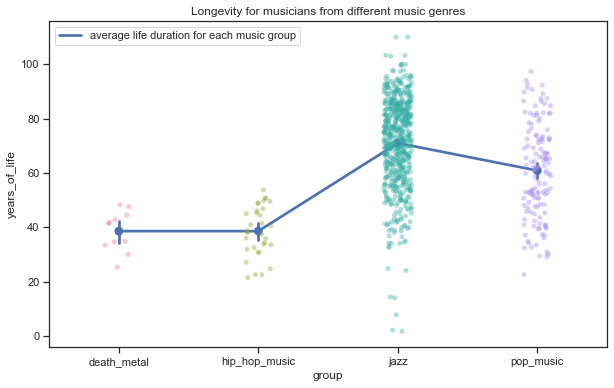

In [62]:
plt.figure(figsize=(10,6))
sns.pointplot(x = df_death.group, y = df_death.years_of_life, dodge=.532)
sns.stripplot(x = df_death.group, y = df_death.years_of_life, dodge=True, jitter=True, palette = "husl", alpha=0.4)


plt.legend(labels=['average life duration for each music group'])
plt.title('Longevity for musicians from different music genres')